In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/'

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

np.random.seed(42)

In [4]:
with open(drive_path + 'arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## Baseline CNN Model

In [6]:
# construct network
model = Sequential()

# feature learning - 1st & 2nd layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# classification
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(28, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
420/420 [==============================] - 51s 120ms/step - loss: 1.3727 - accuracy: 0.5802 - val_loss: 0.7367 - val_accuracy: 0.7586
Epoch 2/10
420/420 [==============================] - 50s 118ms/step - loss: 0.4414 - accuracy: 0.8575 - val_loss: 0.5268 - val_accuracy: 0.8277
Epoch 3/10
420/420 [==============================] - 48s 115ms/step - loss: 0.1830 - accuracy: 0.9424 - val_loss: 0.5594 - val_accuracy: 0.8259
Epoch 4/10
420/420 [==============================] - 49s 117ms/step - loss: 0.0856 - accuracy: 0.9742 - val_loss: 0.5966 - val_accuracy: 0.8336
Epoch 5/10
420/420 [==============================] - 50s 118ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.6521 - val_accuracy: 0.8324
Epoch 6/10
420/420 [==============================] - 50s 118ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.6607 - val_accuracy: 0.8438
Epoch 7/10
420/420 [==============================] - 50s 118ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.6626 - val_ac

In [8]:
model.save(drive_path + 'models/cnn_baseline.h5')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7373824   
_________________________________________________________________
dense_1 (Dense)              (None, 28)                28700     
Total params: 7,403,420
Trainable params: 7,403,420
Non-trainable params: 0
_________________________________________________________________


In [10]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

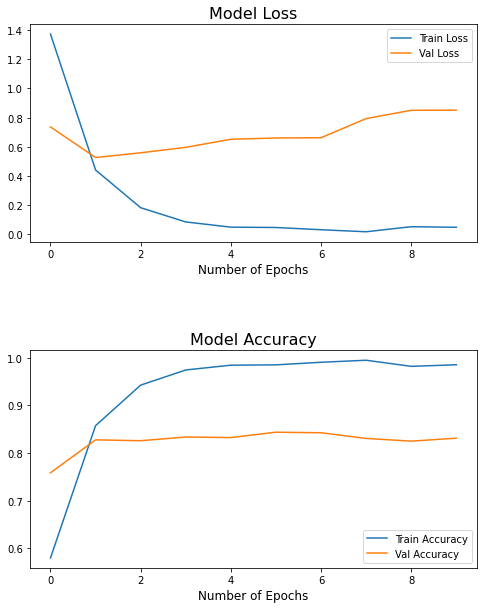

In [11]:
plot_training()

In [12]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 2s 21ms/step - loss: 0.8514 - accuracy: 0.8313


[0.8514226078987122, 0.831250011920929]

Here, we can establish that our baseline model has a loss score of 0.8514 and 83.13% accuracy (this number varies each time the code is ran).